In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [2]:
# Reading my dataset 

df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Checking the dataset heading

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Checking the number of row and column
df.shape

(10000, 14)

In [5]:
#showing the size of my dataset

df.size

140000

In [6]:
# Extracting colums
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Removing repeated data

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
# Printing out the total missing value

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Displaying the data type available in each column
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
#checking for numbers of existing and lost customers 
cust = df['Exited'].value_counts()
print(cust)

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='count'>

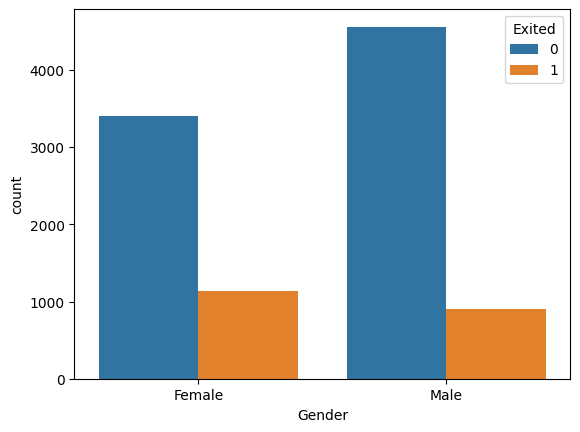

In [13]:
# Distribution of churn using gender
sns.countplot(x='Gender',hue='Exited',data=df)

<AxesSubplot: xlabel='Geography', ylabel='count'>

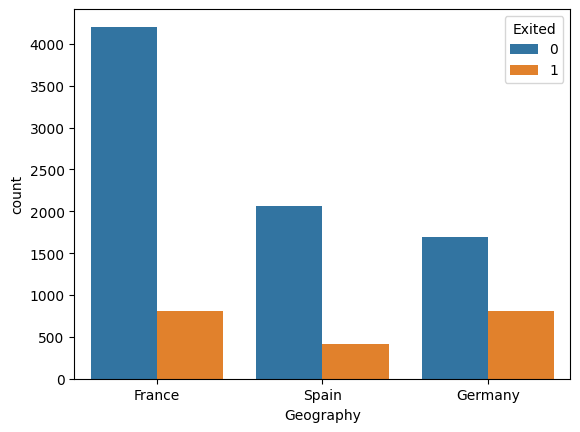

In [14]:
# Distribution of churn using geography
sns.countplot(x='Geography',hue='Exited',data=df)

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

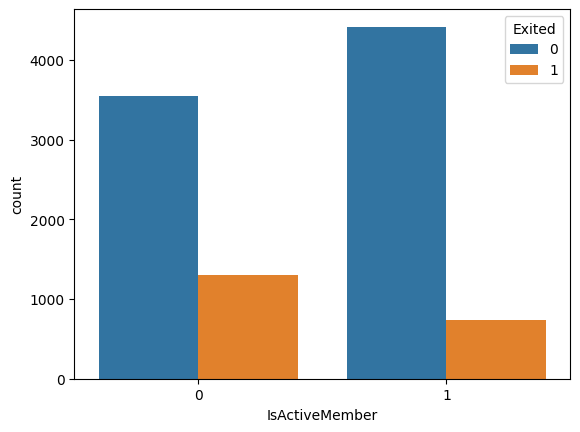

In [15]:
# Distribution of churn using IsActiveMember
sns.countplot(x='IsActiveMember',hue='Exited',data=df)

<AxesSubplot: ylabel='Gender'>

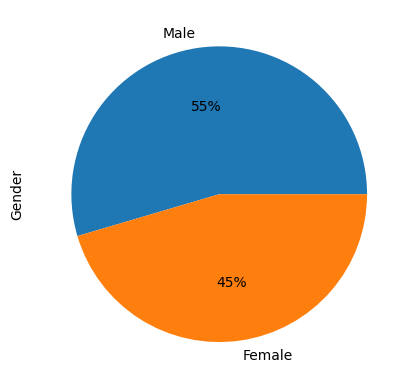

In [16]:
# Gender distribution
df["Gender"].value_counts().plot(kind= 'pie', autopct='%1.0f%%')

<AxesSubplot: xlabel='Geography', ylabel='count'>

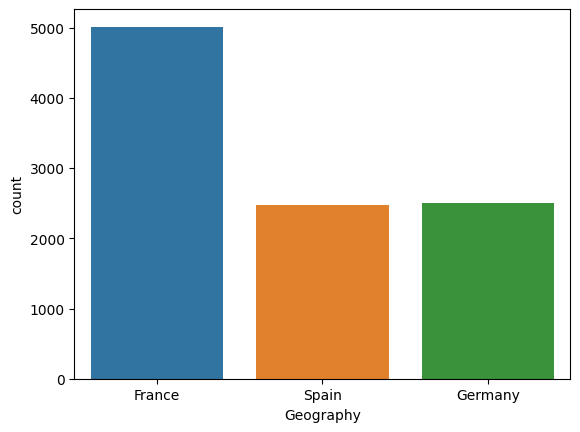

In [17]:
# how do i identif each location
sns.countplot(x='Geography',data=df)

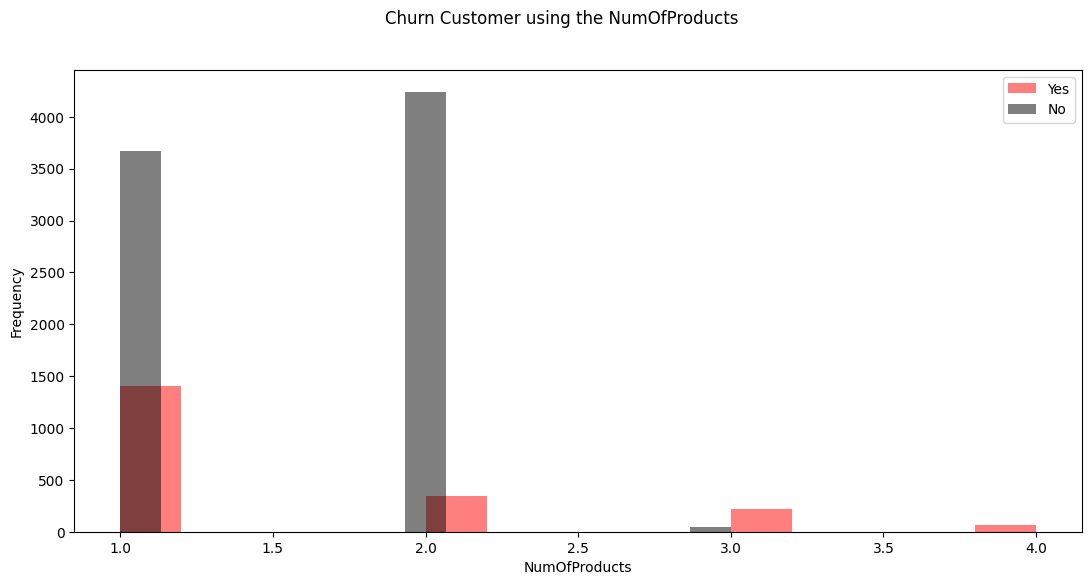

In [18]:
# Distribution of different types of loan
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["Exited"]==1]["NumOfProducts"], bins=15, alpha=0.5, color="red", label="Yes")
ax.hist(df[df["Exited"]==0]["NumOfProducts"], bins=15, alpha=0.5, color="black", label="No")

ax.set_xlabel("NumOfProducts")
ax.set_ylabel("Frequency")

fig.suptitle("Churn Customer using the NumOfProducts")

ax.legend();

In [19]:
# Converting string to integer
df["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)
df["Geography"].replace({'France': 0, 'Spain': 1, "Germany": 2}, inplace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot: >

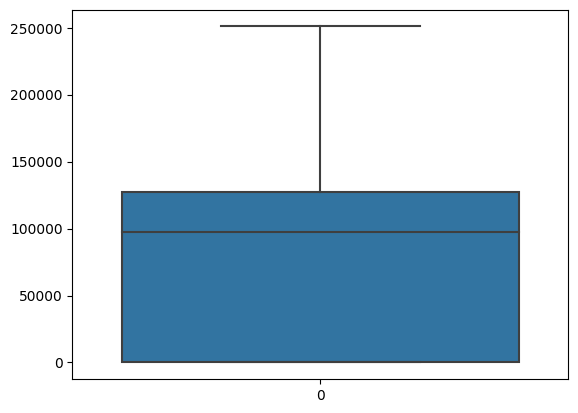

In [20]:
# checking for outliers 
sns.boxplot(df['Balance'])

<AxesSubplot: >

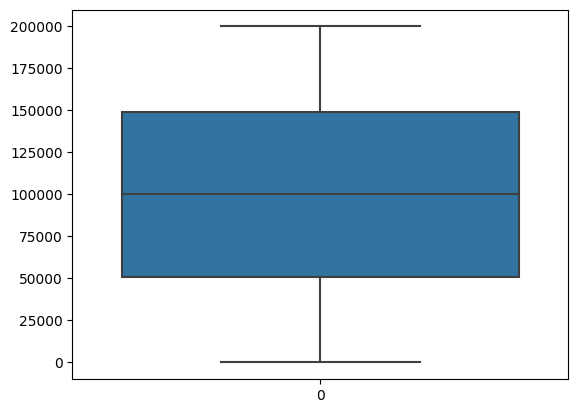

In [21]:
# checking for outliers
sns.boxplot(df['EstimatedSalary'])

C:\Users\joyma\AppData\Local\Temp\ipykernel_4444\661778196.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Figure size 1400x700 with 0 Axes>

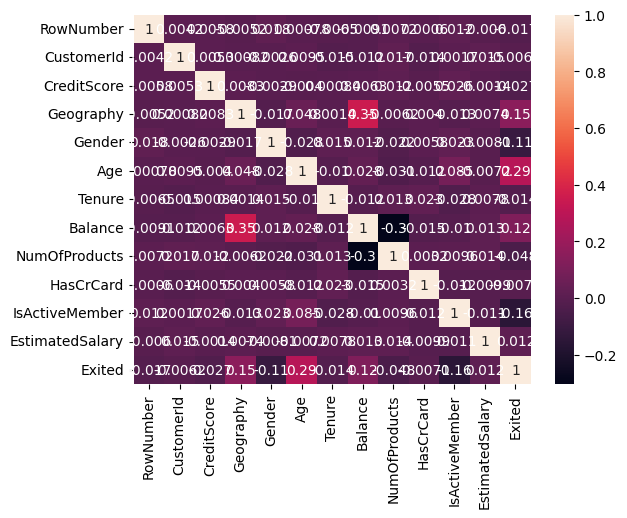

<Figure size 1400x700 with 0 Axes>

In [22]:
# Correlation matric
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.figure(figsize = (14,7))

In [23]:
# Data Standardisation 
df_sd = ['Balance', 'EstimatedSalary', 'CreditScore', 'Age']
Scaler = StandardScaler()
df[df_sd] = Scaler.fit_transform(df[df_sd])

In [24]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,1,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,4,15701354,Boni,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,1,0,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,9997,15569892,Johnstone,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,9998,15584532,Liu,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,9999,15682355,Sabbatini,1.256835,2,1,0.293517,3,-0.022608,2,1,0,-0.125231,1


In [25]:
# spliting the dataset
X=df.drop(columns=['Surname','CustomerId','Exited'],axis=1)
Y=df["Exited"]
X.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,2,-0.440036,1,0,0.198164,1,0.117350,1,0,1,0.216534
2,3,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,4,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,5,2.063884,1,0,0.388871,2,0.785728,1,1,1,-0.365276


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
#print(X.shape,X_train.shape,X_test.shape)
data = {'Data' :['Total', 'x_train', 'x_test'], 'values': [10000, 7000, 3000]}
# type(data)
pd.DataFrame(data)

,Data,values
0,Total,10000
1,x_train,7000
2,x_test,3000


In [27]:
# Using Smote to correct imbalance dataset
smote = SMOTE()
X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train)

<AxesSubplot: ylabel='Exited'>

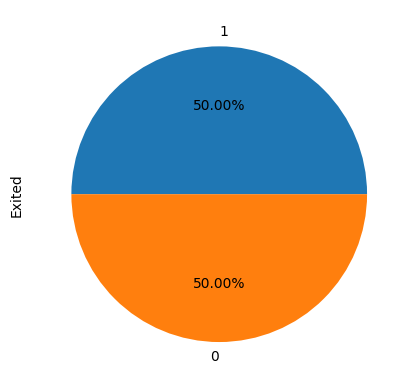

In [28]:
Y_train_sm.value_counts().plot.pie(autopct='%1.2f%%')

In [29]:
# Building a model using LogisticRegression 

lngr_sm = LogisticRegression(random_state=2, max_iter=500, )

lngr_sm.fit(X_train_sm,Y_train_sm)

LogisticRegression(max_iter=500, random_state=2)

In [30]:
# Training the dataset
train_predict_sm=lngr_sm.predict(X_train_sm)
train_accuracy_score = metrics.accuracy_score(Y_train_sm, train_predict_sm)
print("Accuracy on training data: ", train_accuracy_score)

train_precision_score = metrics.precision_score(Y_train_sm, train_predict_sm)
print("Precision on training data:", train_precision_score)

train_recall_score =  metrics.recall_score(Y_train_sm, train_predict_sm)
print("Recall on training data:", train_recall_score)

Accuracy on training data:  0.7675319992788895
Precision on training data: 0.7628409493446688
Recall on training data: 0.7764557418424374


In [31]:
# Evaluate model
test_predict_sm=lngr_sm.predict(X_test)
test_accuracy_score = metrics.accuracy_score(Y_test, test_predict_sm)
print("Accuracy on testing data: ", test_accuracy_score)

test_precision_score = metrics.precision_score(Y_test, test_predict_sm)
print("Precision on testing data:", test_precision_score)

test_recall_score = metrics.recall_score(Y_test, test_predict_sm)
print("Recall on testing data: ", test_recall_score)

Accuracy on testing data:  0.734
Precision on testing data: 0.38163716814159293
Recall on testing data:  0.5907534246575342


In [32]:
# Training and testing result 
data = {'Data' :['Accuracy', 'Precision', 'Recall'], 
        'Training results': [train_accuracy_score, train_precision_score, train_recall_score],
        'Testing results': [test_accuracy_score, test_precision_score, test_recall_score]}
# type(data)
pd.DataFrame(data)
#pd.pivot_table('test_predict_sm')

,Data,Training results,Testing results
0,Accuracy,0.767532,0.734000
1,Precision,0.762841,0.381637
2,Recall,0.776456,0.590753


TN=1857, FP=559, FN=239, TP=345


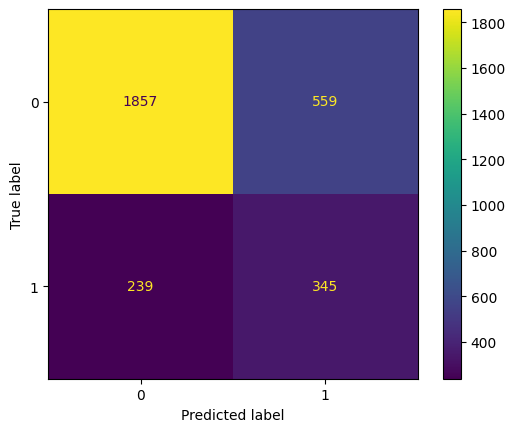

In [33]:
# Generating confusion metrix
cm = metrics.confusion_matrix(Y_test, test_predict_sm)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
# Calculate accuracy, precision and recall from confusion matrix 

calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
calculated_groupfairness = (TP+FP)/(TP+TN+FP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Calculated groupfairness = ", calculated_groupfairness)

Calculated accuracy =  0.734
Calculated precision =  0.38163716814159293
Calculated recall =  0.5907534246575342
Calculated groupfairness =  0.30133333333333334


In [35]:
# result obtained in tabular form
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall', 'Groupfairness'], 
        'Result': [calculated_accuracy, calculated_precision, calculated_recall, calculated_groupfairness]
        }
# type(data)
pd.DataFrame(data)


,Calculated Metrics,Result
0,Accuracy,0.734000
1,Precision,0.381637
2,Recall,0.590753
3,Groupfairness,0.301333


In [36]:
# Dropping the gender column from the training and test data (Gender blind)
X_train_gb = X_train_sm.drop(columns=['Gender'])
X_test_gb = X_test.drop(columns=['Gender'])
X_train_gb.head()

,RowNumber,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,9070,-0.326221,1,-0.660018,4,1.585405,2,1,1,1.264218
1,2604,-0.077899,2,-0.469311,7,1.345318,1,0,1,1.537933
2,7739,-0.926334,0,-0.564665,6,-1.225848,2,0,0,1.279659
3,1580,-0.336568,2,0.198164,8,-0.621581,1,1,1,1.663871
4,5059,0.656722,0,-0.183251,9,1.153648,2,0,1,0.890155


In [37]:
# Building a model for gender blind
lngr_sm_gb = LogisticRegression(random_state=2, max_iter=500, )

lngr_sm_gb.fit(X_train_gb,Y_train_sm)

LogisticRegression(max_iter=500, random_state=2)

In [38]:
# Model Traning 
train_predict_sgb=lngr_sm_gb.predict(X_train_gb)
train_accuracy_score = metrics.accuracy_score(Y_train_sm, train_predict_sgb)
print("Accuracy on train data: ", train_accuracy_score)
train_precision_score = metrics.precision_score(Y_train_sm, train_predict_sgb)
print("Precision using train data:", train_precision_score)
train_recall_score = metrics.recall_score(Y_train_sm, train_predict_sgb)
print("Recall using train data:", train_recall_score)

Accuracy on train data:  0.7436452136289886
Precision using train data: 0.735576085061879
Recall using train data: 0.7607715882458986


In [39]:
# Evaluating model
test_predict_sgb=lngr_sm_gb.predict(X_test_gb)
test_accuracy_score = metrics.accuracy_score(Y_test, test_predict_sgb)
print("Accuracy on test data: ", test_accuracy_score)
test_precision_score = metrics.precision_score(Y_test, test_predict_sgb)
print("Precision using test data:", test_precision_score)
test_recall_score = metrics.recall_score(Y_test, test_predict_sgb)
print("Recall on testing data: ", test_recall_score)

Accuracy on test data:  0.704
Precision using test data: 0.3495049504950495
Recall on testing data:  0.6044520547945206


In [40]:
# tabular representation of findings
data = {'Metric' :['Accuracy', 'Precision', 'Recall'], 
        'Training results': [train_accuracy_score, train_precision_score, train_recall_score],
        'Testing results': [test_accuracy_score, test_precision_score, test_recall_score]}
# type(data)
pd.DataFrame(data)

,Metric,Training results,Testing results
0,Accuracy,0.743645,0.704000
1,Precision,0.735576,0.349505
2,Recall,0.760772,0.604452


TN=1759, FP=657, FN=231, TP=353


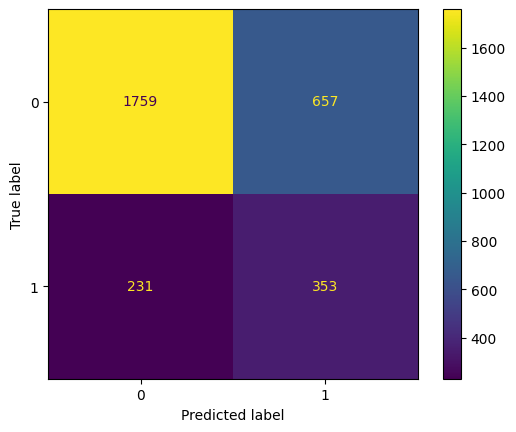

In [41]:
#confusion matrix for gender blind 

cm_gb = metrics.confusion_matrix(Y_test, test_predict_sgb)
TN_gb, FP_gb, FN_gb, TP_gb = cm_gb.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_gb, FP_gb, FN_gb, TP_gb))
disp_gb = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.show()

In [42]:
# Calculate accuracy, precision and recall from confusion matrix 
calculated_accuracy_gb = (TP_gb+TN_gb)/(TP_gb+TN_gb+FP_gb+FN_gb)
calculated_precision_gb = (TP_gb)/(TP_gb+FP_gb)
calculated_recall_gb = (TP_gb)/(TP_gb+FN_gb)
calculated_groupfairness_gb = (TP_gb+FP_gb)/(TP_gb+TN_gb+FP_gb+FN_gb)
print("Calculated accuracy = ", calculated_accuracy_gb)
print("Calculated precision = ", calculated_precision_gb)
print("Calculated recall = ", calculated_recall_gb)
print("Calculated groupfairness = ", calculated_groupfairness_gb)

Calculated accuracy =  0.704
Calculated precision =  0.3495049504950495
Calculated recall =  0.6044520547945206
Calculated groupfairness =  0.33666666666666667


In [43]:
# result obtained in tabular form
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall', 'Groupfairness'], 
        'Result': [calculated_accuracy_gb, calculated_precision_gb,calculated_recall_gb, calculated_groupfairness_gb]
        }
# type(data)
pd.DataFrame(data)

,Calculated Metrics,Result
0,Accuracy,0.704000
1,Precision,0.349505
2,Recall,0.604452
3,Groupfairness,0.336667


In [44]:
# comparing the two result
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall', 'Groupfairness'],
        'Result': [calculated_accuracy, calculated_precision, calculated_recall, calculated_groupfairness], 
        'Result_GB': [calculated_accuracy_gb, calculated_precision_gb, calculated_recall_gb, calculated_groupfairness_gb]
        }
# type(data)
pd.DataFrame(data)

,Calculated Metrics,Result,Result_GB
0,Accuracy,0.734000,0.704000
1,Precision,0.381637,0.349505
2,Recall,0.590753,0.604452
3,Groupfairness,0.301333,0.336667


In [45]:
# Indices for Male and Female

PROTECTED = "Gender"

MALE = 1.0 #male
FEMALE = 0.0 #women

male_indices = np.where(X_test[PROTECTED] == MALE)[0]
female_indices = np.where(X_test[PROTECTED] == FEMALE)[0]

print(male_indices, "\n No of Male =", male_indices.size)
print(female_indices, "\n No of Female =", female_indices.size)

[   0    1    3 ... 2994 2997 2998] 
 No of Male = 1630
[   2    4    6 ... 2995 2996 2999] 
 No of Female = 1370


In [46]:
# Outcomes of churning for male and female

Y_test_m = [Y_test.values[i] for i in male_indices]
Y_test_f = [Y_test.values[i] for i in female_indices]

print(Y_test_m)
print(Y_test_f)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

In [47]:
# Predicted outcomes for the two groups

test_predict_m = [test_predict_sm[i] for i in male_indices]
test_predict_f = [test_predict_sm[i] for i in female_indices]

print(test_predict_m)
print(test_predict_f)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

In [48]:
#creating the X_test male and female

X_test_m = [X_test.values[i] for i in male_indices]
X_test_f = [X_test.values[i] for i in female_indices]

print(test_predict_m)
print(test_predict_f)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

In [49]:
#calculating Accuracy, Precision and Recall scores for male

test_predict_m=lngr_sm.predict(X_test_m)
test_accuracy_score = metrics.accuracy_score(Y_test_m, test_predict_m)
print("Accuracy on male test data: ", test_accuracy_score)
test_precision_score = metrics.precision_score(Y_test_m, test_predict_m)
print("Precision using male test data:", test_precision_score)
test_recall_score = metrics.recall_score(Y_test_m, test_predict_m)
print("Recall on male testing data: ", test_recall_score)

Accuracy on male test data:  0.8202453987730062
Precision using male test data: 0.43359375
Recall on male testing data:  0.42857142857142855


C:\Users\joyma\anaconda3\envs\QL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
# computing result matrix for male
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall',],
        'Result_male': [test_accuracy_score, test_precision_score, test_recall_score], 
       }
# type(data)
pd.DataFrame(data)

,Calculated Metrics,Result_male
0,Accuracy,0.820245
1,Precision,0.433594
2,Recall,0.428571


TN=1226, FP=145, FN=148, TP=111


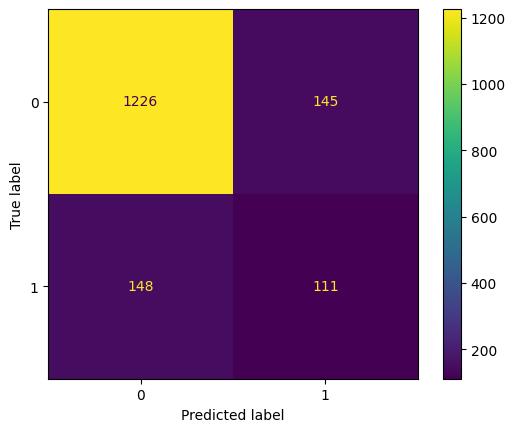

In [51]:
#Confusion matrix for male 

cm_m = metrics.confusion_matrix(Y_test_m, test_predict_m)
TN_m, FP_m, FN_m, TP_m = cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_m, FP_m,FN_m, TP_m))
disp_m =metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp_m.plot()
plt.show()

In [52]:
# Calculate accuracy, precision and recall from confusion matrix (male)
calculated_accuracy_m = (TP_m+TN_m)/(TP_m+TN_m+FP_m+FN_m)
calculated_precision_m = (TP_m)/(TP_m+FP_m)
calculated_recall_m = (TP_m)/(TP_m+FN_m)
calculated_groupfairness_m = (TP_m+FP_m)/(TP_m+TN_m+FP_m+FN_m)
print("Calculated accuracy = ", calculated_accuracy_m)
print("Calculated precision = ", calculated_precision_m)
print("Calculated recall = ", calculated_recall_m)
print("Calculated groupfairness = ", calculated_groupfairness_m)

Calculated accuracy =  0.8202453987730062
Calculated precision =  0.43359375
Calculated recall =  0.42857142857142855
Calculated groupfairness =  0.1570552147239264


In [53]:
# result obtained in tabular form
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall', 'Groupfairness'], 
        'Result_M': [calculated_accuracy_m, calculated_precision_m,calculated_recall_m, calculated_groupfairness_m]
        }
# type(data)
pd.DataFrame(data)

,Calculated Metrics,Result_M
0,Accuracy,0.820245
1,Precision,0.433594
2,Recall,0.428571
3,Groupfairness,0.157055


In [54]:
#calculatin Accuracy, Precision and Recall scores for female
test_predict_f=lngr_sm.predict(X_test_f)
test_accuracy_score = metrics.accuracy_score(Y_test_f, test_predict_f)
print("Accuracy on female test data: ", test_accuracy_score)
test_precision_score = metrics.precision_score(Y_test_f, test_predict_f)
print("Precision using female test data:", test_precision_score)
test_recall_score = metrics.recall_score(Y_test_f, test_predict_f)
print("Recall on female testing data: ", test_recall_score)

Accuracy on female test data:  0.6313868613138686
Precision using female test data: 0.3611111111111111
Recall on female testing data:  0.72


C:\Users\joyma\anaconda3\envs\QL\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
# computing result matrix for female
data = {'Metrics' :['Accuracy', 'Precision', 'Recall',],
        'Result_female': [test_accuracy_score, test_precision_score, test_recall_score], 
       }
# type(data)
pd.DataFrame(data)

,Metrics,Result_female
0,Accuracy,0.631387
1,Precision,0.361111
2,Recall,0.720000


TN=631, FP=414, FN=91, TP=234


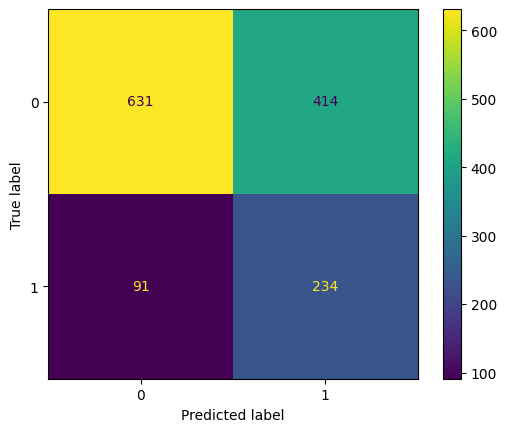

In [56]:
#Confusion matrix for female

cm_f = metrics.confusion_matrix(Y_test_f, test_predict_f)
TN_f, FP_f, FN_f, TP_f = cm_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_f, FP_f,FN_f, TP_f))
disp_f =metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp_f.plot()
plt.show()

In [57]:
# Calculate accuracy, precision and recall from confusion matrix (male)
calculated_accuracy_f = (TP_f+TN_f)/(TP_f+TN_f+FP_f+FN_f)
calculated_precision_f = (TP_f)/(TP_f+FP_f)
calculated_recall_f = (TP_f)/(TP_f+FN_f)
calculated_groupfairness_f = (TP_f+FP_f)/(TP_f+TN_f+FP_f+FN_f)
print("Calculated accuracy = ", calculated_accuracy_f)
print("Calculated precision = ", calculated_precision_f)
print("Calculated recall = ", calculated_recall_f)
print("Calculated groupfairness = ", calculated_groupfairness_f)

Calculated accuracy =  0.6313868613138686
Calculated precision =  0.3611111111111111
Calculated recall =  0.72
Calculated groupfairness =  0.472992700729927


In [58]:
# result obtained in tabular form
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall', 'Groupfairness'], 
        'Result_F': [calculated_accuracy_f, calculated_precision_f,calculated_recall_f, calculated_groupfairness_f]
        }
# type(data)
pd.DataFrame(data)

,Calculated Metrics,Result_F
0,Accuracy,0.631387
1,Precision,0.361111
2,Recall,0.720000
3,Groupfairness,0.472993


In [59]:
# comparing the two result
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall', 'Groupfairness'],
        'Resul_M': [calculated_accuracy_m, calculated_precision_m, calculated_recall_m, calculated_groupfairness_m], 
        'Result_F': [calculated_accuracy_f, calculated_precision_f, calculated_recall_f, calculated_groupfairness_f]
        }
# type(data)
pd.DataFrame(data)

,Calculated Metrics,Resul_M,Result_F
0,Accuracy,0.820245,0.631387
1,Precision,0.433594,0.361111
2,Recall,0.428571,0.720000
3,Groupfairness,0.157055,0.472993


In [60]:
# Tabular representation of the total result
data = {'Calculated Metrics' :['Accuracy', 'Precision', 'Recall', 'Groupfairness'],
        'Result': [calculated_accuracy, calculated_precision, calculated_recall, calculated_groupfairness], 
        'Result_GB': [calculated_accuracy_gb, calculated_precision_gb, calculated_recall_gb, calculated_groupfairness_gb],
        'Resul_M': [calculated_accuracy_m, calculated_precision_m, calculated_recall_m, calculated_groupfairness_m], 
        'Result_F': [calculated_accuracy_f, calculated_precision_f, calculated_recall_f, calculated_groupfairness_f]
        }
# type(data)
pd.DataFrame(data)


,Calculated Metrics,Result,Result_GB,Resul_M,Result_F
0,Accuracy,0.734000,0.704000,0.820245,0.631387
1,Precision,0.381637,0.349505,0.433594,0.361111
2,Recall,0.590753,0.604452,0.428571,0.720000
3,Groupfairness,0.301333,0.336667,0.157055,0.472993
